## Import libbaries

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## loading dataset

In [181]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head()
           

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Exploration:

In [184]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [188]:
#check missing value
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [190]:
#droping cabin 
df = df.drop("Cabin", axis=1)

In [192]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [194]:
#filling missing ages 
df['Age'].fillna(df['Age'].mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Data visuslization

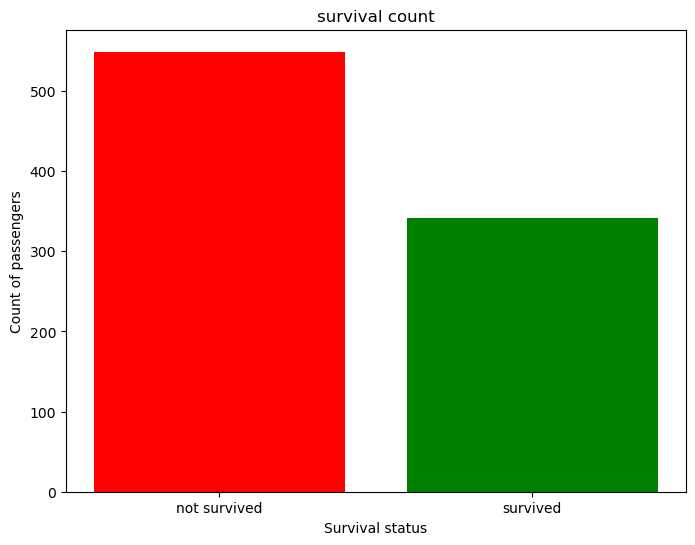

In [131]:
plt.figure(figsize=(8,6))
survivalcount=df["Survived"].value_counts()
plt.bar(survivalcount.index,survivalcount.values,color=['red','green'])
plt.title("survival count")
plt.xticks(ticks=[0,1],labels=["not survived","survived"])
plt.xlabel('Survival status')
plt.ylabel("Count of passengers")
plt.show()



In [197]:
#Counting surviver and not surviver
survivalcount=df["Survived"].value_counts()
survivalcount

Survived
0    549
1    342
Name: count, dtype: int64

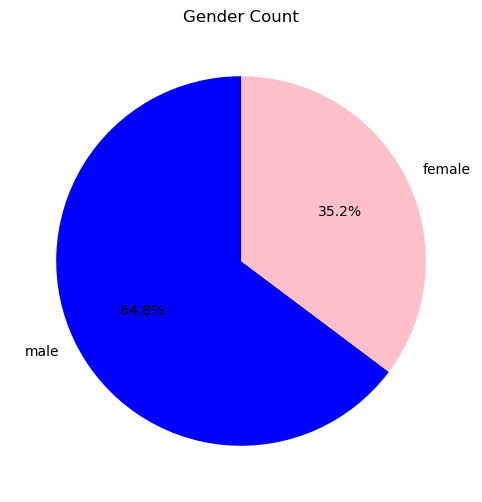

In [199]:
# sex of the passenger
plt.show()
gender_count=df["Sex"].value_counts()
plt.figure(figsize=(8,6))
plt.pie(gender_count, labels=gender_count.index,autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])
plt.title("Gender Count")
plt.show()


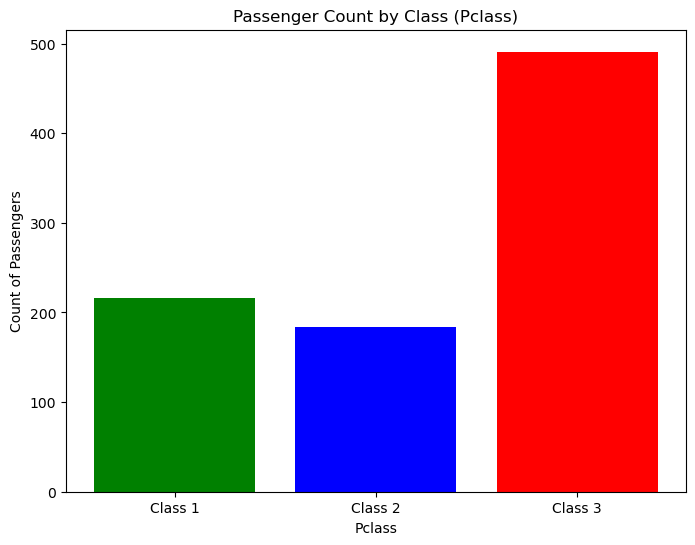

In [201]:
#classes of the pasengers
Pclass_count = df['Pclass'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(Pclass_count.index, Pclass_count.values, color=['red', 'green', 'blue'])
plt.title("Passenger Count by Class (Pclass)")
plt.xlabel('Pclass')
plt.ylabel('Count of Passengers')
plt.xticks(ticks=Pclass_count.index, labels=[f'Class {i}' for i in Pclass_count.index])  # Optional: label classes
plt.show()

In [229]:
age_survival_counts = df.groupby(['Age', 'Survived']).size().reset_index(name='Count')
age_survival_counts

,Age,Survived,Count
0,0.42,1,1
1,0.67,1,1
2,0.75,1,2
3,0.83,1,2
4,0.92,1,1
...,...,...,...
137,70.00,0,2
138,70.50,0,1
139,71.00,0,2
140,74.00,0,1


(array([30., 14., 10., 14.,  3., 29., 39., 65., 73., 42., 65., 62., 33.,
        47., 38., 21., 28., 21., 16., 14., 15.,  7.,  9.,  8.,  4.,  0.,
         5.,  1.,  0.,  1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <BarContainer object of 30 artists>)

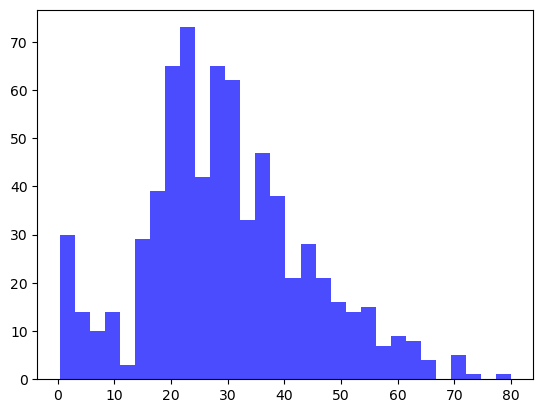

In [139]:
plt.hist(df['Age'].dropna(), bins=30, color='blue', alpha=0.7)

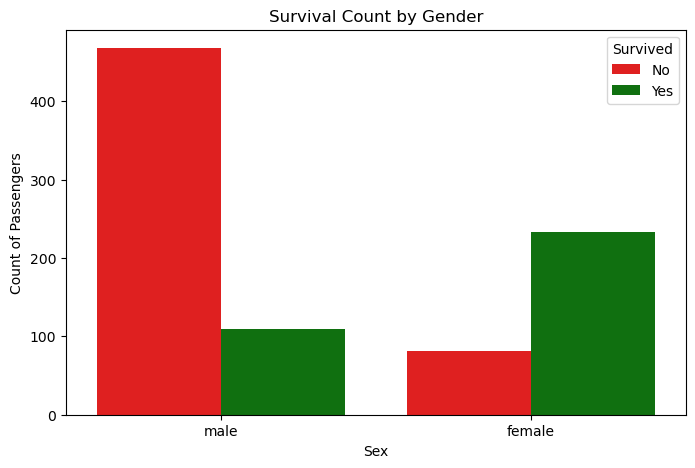

In [203]:
# Survival by Sex
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=df, palette=['red', 'green'])
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Count of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])  
plt.show() 

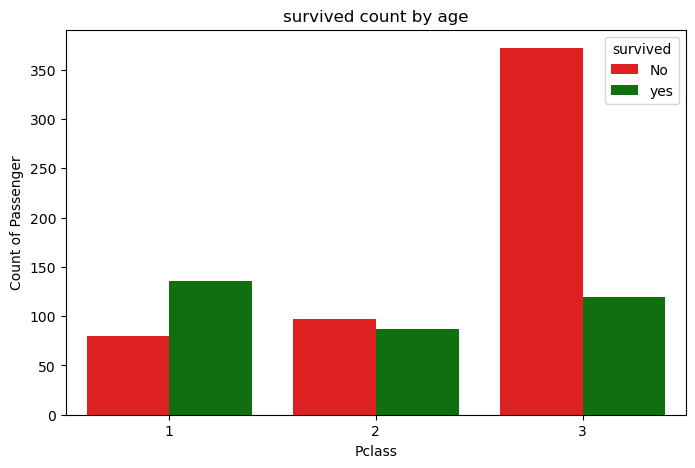

In [205]:
#Survival by Pclass
plt.figure(figsize=(8,5))
sns.countplot(x="Pclass",hue="Survived",data=df,palette=["red","green"])
plt.title("survived count by age")
plt.xlabel("Pclass")
plt.ylabel("Count of Passenger")
plt.legend(title="survived", labels=["No","yes"])
 
plt.show()

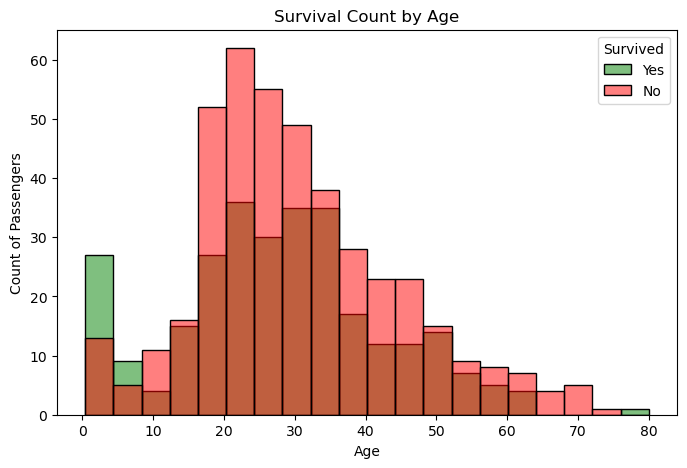

In [207]:
## Survival by Age
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Age", hue="Survived", palette=["red", "green"])
plt.title("Survival Count by Age")
plt.xlabel("Age")
plt.ylabel("Count of Passengers")
plt.legend(title="Survived", labels=["Yes", "No"])

plt.show()

In [209]:
#encoding sex
label_encoder=LabelEncoder()
df["Sex"]= label_encoder.fit_transform(df["Sex"])

## Selecting Features

In [212]:
# Define features and target variable
features = ['Pclass', 'Sex', 'Age']
X = df[features]
y = df['Survived']

In [214]:
X

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,0,19.0
888,3,0,NaN
889,1,1,26.0


##  Split the dataset 

In [217]:
# Split the dataset into training and testing sets.

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Buildig Model

In [220]:
model = RandomForestClassifier(random_state=42)
# Fit the model to the training data
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [222]:
#Predicting the model to test dataset
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

## Evaluating the model

In [225]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

[[90 15]
 [22 52]]
